<a href="https://colab.research.google.com/github/AlessiaLeoFolliero/Algorithms-for-Massive-Data--Leaves-classification/blob/main/Leaves_Cnn_Alessia_Leo_Folliero_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dataset:

In [ ]:
import pandas as pd
import tensorflow
import keras
import pandas
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import subprocess
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "xxxxxxxxxxxxxxxx"
os.environ['KAGGLE_KEY'] = "xxxxxxxxxxxxxxxxxxxxx"
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification


100% 6.56G/6.56G [01:08<00:00, 144MB/s]
100% 6.56G/6.56G [01:08<00:00, 103MB/s]


In [ ]:
#unzip
!unzip -q /content/plant-leaves-for-image-classification.zip

Cleaning the dataset: Delete all the diseased image

In [ ]:
directory_test = "/content/Plants_2/test"
subprocess.call(['find', directory_test, '-type', 'd', '-name', '*diseased*', '-exec', 'rm', '-r', '{}', ';'])

1

In [ ]:
directory_train = "/content/Plants_2/train"
subprocess.call(['find', directory_train, '-type', 'd', '-name', '*diseased*', '-exec', 'rm', '-r', '{}', ';'])

1

In [ ]:
directory_valid = "/content/Plants_2/valid"
subprocess.call(['find', directory_valid, '-type', 'd', '-name', '*diseased*', '-exec', 'rm', '-r', '{}', ';'])

1

In [ ]:
dir='/content/Plants_2/train/Alstonia Scholaris healthy (P2b)/0003_0011.JPG'
with Image.open(dir) as img:
     img.load()

In [ ]:
img.size

(6000, 4000)

In [ ]:
img.format

'JPEG'

In [ ]:
img.mode

'RGB'

Showing the image with matplotlib

In [ ]:
import matplotlib.pyplot as plt

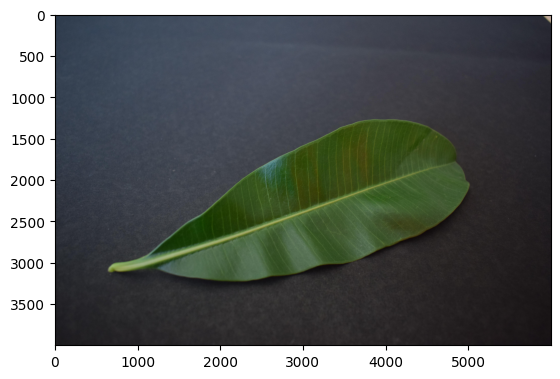

In [ ]:
plt.imshow(img)
plt.show()

Resizing the image

In [ ]:
# Directory where images are located
root_directory = '/content/Plants_2/test'

# Output directory where resized images will be saved
output_directory = '/content/Plants_2/test_r'

# Function to resize an image
def resize_image(input_path, output_path, size):
    try:
        img = Image.open(input_path)
        img = img.resize(size)
        img.save(output_path)
        print(f'Resized: {output_path}')
    except Exception as e:
        print(f'Error resizing {input_path}: {e}')

# Function to resize images in a directory and its subdirectories
def resize_images_in_directory(directory, output_dir, size=(100, 100)):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file has a common image file extension 
            if file.lower().endswith(('.jpg')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, directory)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                resize_image(input_path, output_path, size)

# Call the function
resize_images_in_directory(root_directory, output_directory, size=(256, 256))

Resized: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0007.JPG
Resized: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0010.JPG
Resized: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0006.JPG
Resized: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0009.JPG
Resized: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0008.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0003.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0005.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0001.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0002.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0004.JPG
Resized: /content/Plants_2/test_r/Pomegranate healthy (P9a)/0009_0001.JPG
Resized: /content/Plants_2/test_r/Pomegranate healthy (P9a)/0009_0003.JPG
Resized: /content/Plants_2/test_r/Pomegranate healthy (P9a)/0009_0005.JPG
Resized: /content/Plants_2/test_r/Pomegranate healthy (P9a)/0009_0004.JPG
Resized: /content/Plants

In [ ]:
# Specify the directory where images are located
root_directory = '/content/Plants_2/valid'

# Specify the output directory where resized images will be saved
output_directory = '/content/Plants_2/valid_r'

# Call the function
resize_images_in_directory(root_directory, output_directory, size=(256, 256))

Resized: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0004.JPG
Resized: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0005.JPG
Resized: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0001.JPG
Resized: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0002.JPG
Resized: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0003.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0010.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0006.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0007.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0009.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0008.JPG
Resized: /content/Plants_2/valid_r/Pomegranate healthy (P9a)/0009_0009.JPG
Resized: /content/Plants_2/valid_r/Pomegranate healthy (P9a)/0009_0006.JPG
Resized: /content/Plants_2/valid_r/Pomegranate healthy (P9a)/0009_0010.JPG
Resized: /content/Plants_2/valid_r/Pomegranate healthy (P9a)/0009_0007.JPG
Resized: /

In [ ]:
# Specify the directory where images are located
root_directory = '/content/Plants_2/train'

# Specify the output directory where resized images will be saved
output_directory = '/content/Plants_2/train_r'

# Call the function
resize_images_in_directory(root_directory, output_directory, size=(256, 256))

Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0035.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0139.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0204.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0075.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0105.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0114.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0266.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0190.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0123.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0239.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0030.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0217.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0052.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0066.JPG
Resized: /content/Plants_2/train_r

Convert Imagese to greyscale

In [ ]:
# Directory where images are
root_directory = '/content/Plants_2/train_r'

# Specify the output directory where grayscale images will be saved
output_directory = '/content/Plants_2/train_r'

# Function to convert an image to grayscale
def convert_to_grayscale(input_path, output_path):
    try:
        img = Image.open(input_path)
        img = img.convert("RGB")
        img = img.convert('L')  # Convert to grayscale
        img.save(output_path)
        print(f'Converted to grayscale: {output_path}')
    except Exception as e:
        print(f'Error converting {input_path} to grayscale: {e}')

# Function to convert images to grayscale in a directory and its subdirectories
def convert_images_to_grayscale_in_directory(directory, output_dir):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file has a common image file extension (you can extend this list)
            if file.lower().endswith(('.jpg')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, directory)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                convert_to_grayscale(input_path, output_path)

# Call the function
convert_images_to_grayscale_in_directory(root_directory, output_directory)

Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0035.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0139.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0204.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0075.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0105.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0114.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0266.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0190.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0123.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0239.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0030.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0

In [ ]:
# Specify the directory where your images are located
root_directory = '/content/Plants_2/test_r'

# Specify the output directory where grayscale images will be saved
output_directory = '/content/Plants_2/test_r'

# Call the function
convert_images_to_grayscale_in_directory(root_directory, output_directory)

Converted to grayscale: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0007.JPG
Converted to grayscale: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0010.JPG
Converted to grayscale: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0006.JPG
Converted to grayscale: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0009.JPG
Converted to grayscale: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0008.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0003.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0005.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0001.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0002.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0004.JPG
Converted to grayscale: /content/Plants_2/test_r/Pomegranate healthy (P9a)/0009_0001.JPG
Converted to grayscale: /content/Plants_2/test_r/Pomegranate healthy (P9a)/0009_0

In [ ]:
# Specify the directory where your images are located
root_directory = '/content/Plants_2/valid_r'

# Specify the output directory where grayscale images will be saved
output_directory = '/content/Plants_2/valid_r'

# Call the function
convert_images_to_grayscale_in_directory(root_directory, output_directory)

Converted to grayscale: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0004.JPG
Converted to grayscale: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0005.JPG
Converted to grayscale: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0001.JPG
Converted to grayscale: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0002.JPG
Converted to grayscale: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0003.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0010.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0006.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0007.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0009.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0008.JPG
Converted to grayscale: /content/Plants_2/valid_r/Pomegranate healthy (P9a)/0009_0009.JPG
Converted to grayscale: /content/Plants_2/valid_r/Pomegranate healthy 

Creation of Image Data Generator objects for Train, Validation and Test

In [ ]:
# Image data generator objects
tv_datagenerat = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to the range [0, 1]
    zoom_range=0.2,
    horizontal_flip=False
)
test_datagen=ImageDataGenerator(rescale=1.0/255)

Train and Validation data generation

In [ ]:
# Load and generate the training data
train_generator = tv_datagenerat.flow_from_directory(
    directory=r'/content/Plants_2/train_r',
    target_size=(256,256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    shuffle=True,
    seed=234,
    #class_mode='categorical'  # 'categorical' for multi-class classification
)

# Load and generate the validation data
valid_generator=tv_datagenerat.flow_from_directory(
    directory=r'/content/Plants_2/valid_r',
    target_size=(256,256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    shuffle=True,
    seed=234,
)


Found 2163 images belonging to 11 classes.
Found 55 images belonging to 11 classes.


Test data generation

In [ ]:
test_generat=test_datagen.flow_from_directory(
    directory=r'/content/Plants_2/test_r',
    target_size=(256,256),
    color_mode='grayscale',
    batch_size=32,
    seed=234,
    class_mode='sparse',
    shuffle=False
)

Found 55 images belonging to 11 classes.


Reprint the image to see how did it change

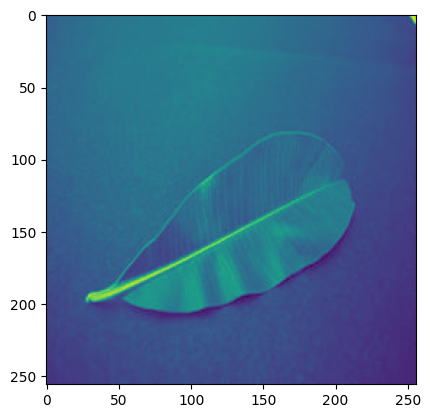

In [ ]:
dir='//content/Plants_2/train_r/Alstonia Scholaris healthy (P2b)/0003_0011.JPG'
with Image.open(dir) as img:
     img.load()
plt.imshow(img)
plt.show()

In [ ]:
img.size

(256, 256)

In [ ]:
img.format

'JPEG'

In [ ]:
img.mode

'L'

In [ ]:
# Check if the image is in grayscale
is_grayscale = img.mode == "L"

if is_grayscale:
    print("The image is in grayscale.")
else:
    print("The image is not in grayscale.")

The image is in grayscale.


Construction on CCN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
!pip install keras-tuner
import keras_tuner
from keras_tuner.tuners import Hyperband
from keras_tuner import Hyperband
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
import keras
from keras.layers import LeakyReLU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
#defining model
def My_Cnn(param):
  model=Sequential()

  #adding convolution layer
  model.add(Conv2D(filters=param.Int('conv1_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',input_shape=(256,256,1),padding="same"))
  #adding pooling layer
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), padding='same'))
  #Dropoutlayer
  model.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.3, step=0.05)))


  ###Second Layer
  model.add(Conv2D(filters=param.Int('conv2_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',input_shape=(256,256,1),padding="same"))
  model.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model.add(Dropout(param.Float('drop_2', min_value=0.0, max_value=0.3, step=0.05)))

  ###Third Layer
  model.add(Conv2D(filters=param.Int('conv3_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',input_shape=(256,256,1),padding="same"))
  model.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model.add(Dropout(param.Float('drop_3', min_value=0.0, max_value=0.3, step=0.05)))

  #adding fully connected layer
  model.add(Flatten())
  model.add(Dense(units=param.Int('units', min_value=32, max_value=128, step=16),activation='relu'))
  model.add(Dropout(param.Float('drop_c', min_value=0.0, max_value=0.3, step=0.05)))

  #adding output layer
  model.add(Dense(11,activation='softmax'))

  #compiling the model
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [ ]:
!pip install -q -U keras-tuner

Hyperparameter tuning with keras tuner

In [ ]:
tuner_r = keras_tuner.RandomSearch(My_Cnn,
  objective='val_accuracy',
  max_trials=5,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='leaves',
  overwrite=True)

Perform hyperparameter search

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator, validation_data = valid_generator, epochs=8)

Trial 5 Complete [00h 06m 58s]
val_accuracy: 0.7515151500701904

Best val_accuracy So Far: 0.8242424329121908
Total elapsed time: 00h 36m 39s


In [ ]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'conv1_filter': 80,
 'drop_1': 0.0,
 'conv2_filter': 112,
 'drop_2': 0.2,
 'conv3_filter': 48,
 'drop_3': 0.2,
 'units': 112,
 'drop_c': 0.0}

Model with best parameters

In [ ]:
model_best= tuner_r.hypermodel.build(best_hps)

In [ ]:
model_best.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 80)      800       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 128, 128, 80)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 128, 128, 80)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 112)     80752     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 64, 64, 112)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 64, 64, 112)      

Model training with 10 epochs

In [ ]:
mm_10=model_best.fit(train_generator, validation_data = valid_generator, epochs=10, batch_size=32)

Epoch 1/10
68/68 [==============================] - 20s 259ms/step - loss: 1.8606 - accuracy: 0.3588 - val_loss: 1.4915 - val_accuracy: 0.4909
Epoch 2/10
68/68 [==============================] - 17s 252ms/step - loss: 1.0196 - accuracy: 0.6634 - val_loss: 0.9464 - val_accuracy: 0.6909
Epoch 3/10
68/68 [==============================] - 17s 250ms/step - loss: 0.7507 - accuracy: 0.7716 - val_loss: 0.6526 - val_accuracy: 0.7818
Epoch 4/10
68/68 [==============================] - 18s 265ms/step - loss: 0.6217 - accuracy: 0.8114 - val_loss: 0.5359 - val_accuracy: 0.7818
Epoch 5/10
68/68 [==============================] - 17s 251ms/step - loss: 0.5114 - accuracy: 0.8507 - val_loss: 0.5681 - val_accuracy: 0.8545
Epoch 6/10
68/68 [==============================] - 17s 251ms/step - loss: 0.4623 - accuracy: 0.8692 - val_loss: 0.6974 - val_accuracy: 0.7273
Epoch 7/10
68/68 [==============================] - 18s 263ms/step - loss: 0.4262 - accuracy: 0.8669 - val_loss: 0.5292 - val_accuracy: 0.8182

In [ ]:
mt10=model_best.evaluate(test_generat)

2/2 [==============================] - 0s 38ms/step - loss: 0.4544 - accuracy: 0.8182


Loss and validation graphs

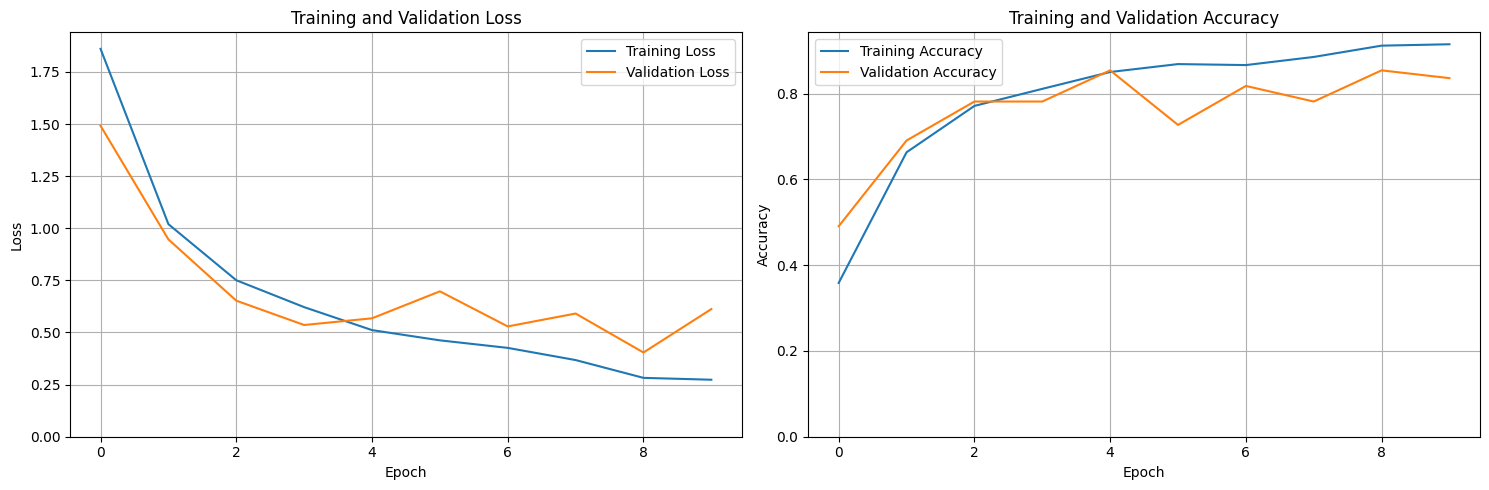

In [ ]:

# Extract loss and validation accuracy from the training history
loss = mm_10.history['loss']
val_loss = mm_10.history['val_loss']
accuracy = mm_10.history['accuracy']
val_accuracy = mm_10.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()


Model training with 30 epochs and early stopping

In [ ]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3,start_from_epoch=20)
mm_30=model_best.fit(train_generator, validation_data = valid_generator, epochs=30,callbacks=[early_stop],verbose=1,batch_size=32)

Epoch 1/30
68/68 [==============================] - 20s 264ms/step - loss: 1.8589 - accuracy: 0.3412 - val_loss: 1.2339 - val_accuracy: 0.4909
Epoch 2/30
68/68 [==============================] - 17s 252ms/step - loss: 1.0264 - accuracy: 0.6648 - val_loss: 0.9061 - val_accuracy: 0.7455
Epoch 3/30
68/68 [==============================] - 18s 267ms/step - loss: 0.7822 - accuracy: 0.7388 - val_loss: 0.7866 - val_accuracy: 0.6909
Epoch 4/30
68/68 [==============================] - 17s 256ms/step - loss: 0.6863 - accuracy: 0.7952 - val_loss: 0.8181 - val_accuracy: 0.7455
Epoch 5/30
68/68 [==============================] - 17s 254ms/step - loss: 0.5574 - accuracy: 0.8303 - val_loss: 0.5720 - val_accuracy: 0.8182
Epoch 6/30
68/68 [==============================] - 18s 263ms/step - loss: 0.4909 - accuracy: 0.8484 - val_loss: 0.5861 - val_accuracy: 0.8182
Epoch 7/30
68/68 [==============================] - 17s 251ms/step - loss: 0.4075 - accuracy: 0.8622 - val_loss: 0.5251 - val_accuracy: 0.8000

Evaluation of the model on the test data


In [ ]:
mt30=model_best.evaluate(test_generat)


2/2 [==============================] - 0s 43ms/step - loss: 0.2511 - accuracy: 0.9455


In [ ]:
print('Test loss:', mt30[0])
print('Test accuracy:', mt30[1])


Test loss: 0.25108659267425537
Test accuracy: 0.9454545378684998


Plot

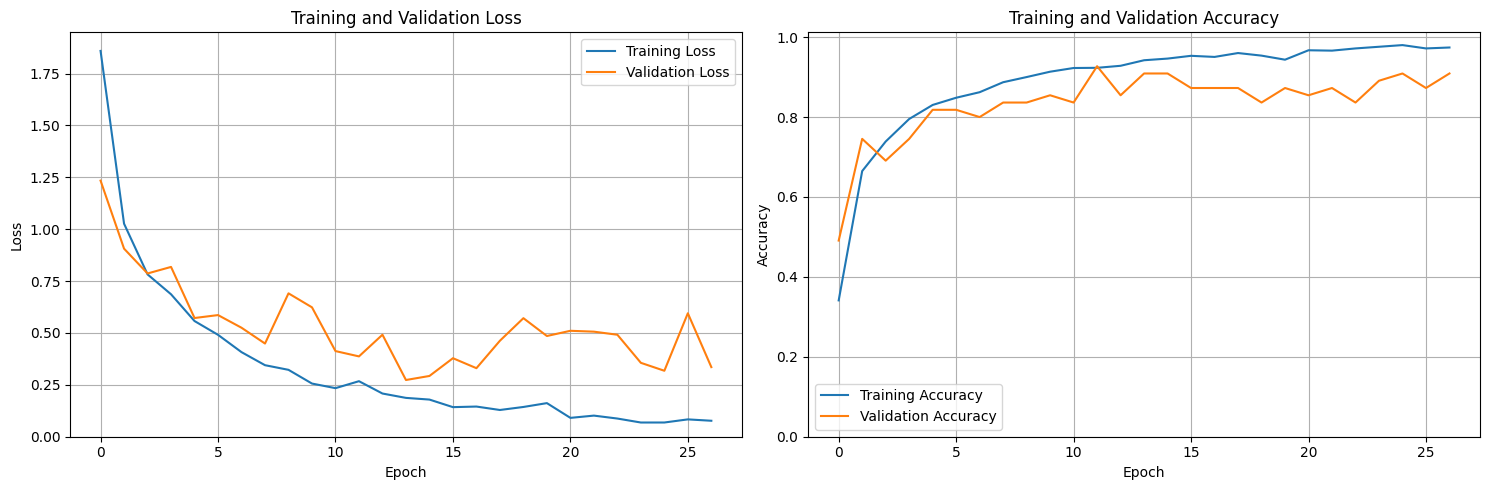

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_30.history['loss']
val_loss = mm_30.history['val_loss']
accuracy = mm_30.history['accuracy']
val_accuracy = mm_30.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Model performance evaluation

In [ ]:
def show_performance(tr_res, metric, metric_label):

	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                            	validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]

	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')

	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=10,
         	color='green')

	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

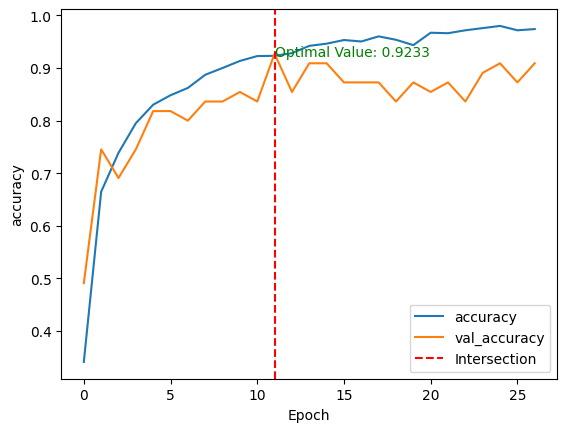

In [ ]:
show_performance(mm_30, 'accuracy', 'accuracy')

Now we want to understand what my model is good at predicting and what it is not.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

2/2 [==============================] - 0s 37ms/step


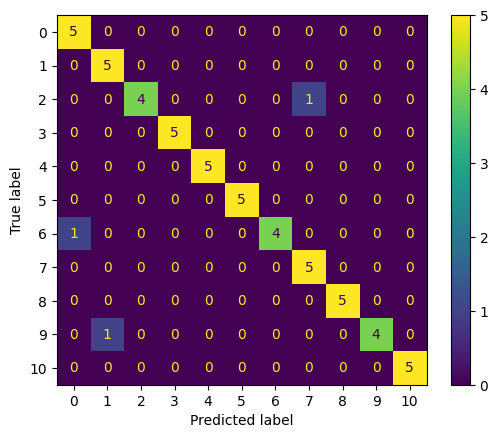

In [ ]:
test_predic = model_best.predict(test_generat)

test_predicted_labels = np.argmax(test_predic, axis=1)

test_true_labels = test_generat.classes

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()